In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.utils import indexable
from sklearn.utils.validation import _num_samples
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
covid_out = pd.read_csv('COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths_20240603.csv')
covid_waste = pd.read_csv('SARS-CoV-2_concentrations_measured_in_NYC_Wastewater_20240603.csv')
covid_case =pd.read_csv('DOHMH_Covid-19_Milestone_Data__New_Cases_of_Covid-19__7_Day_Average__20240606.csv')


In [3]:
def column_summary(covid_out):
    summary_data = []
    
    for col_name in covid_out.columns:
        col_dtype = covid_out[col_name].dtype
        num_of_nulls = covid_out[col_name].isnull().sum()
        num_of_non_nulls = covid_out[col_name].notnull().sum()
        num_of_distinct_values = covid_out[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = covid_out[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = covid_out[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_covid_out = pd.DataFrame(summary_data)
    return summary_covid_out
summary_covid_out = column_summary(covid_out)
display(summary_covid_out)


,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,extract_date,object,0,176148,532,"{'10/01/2021': 625, '09/30/2021': 625, '09/29/..."
1,specimen_date,object,0,176148,643,"{'03/31/2020': 532, '03/13/2020': 532, '03/26/..."
2,Number_tested,int64,0,176148,14740,"{1: 6008, 2: 4459, 4: 1343, 3: 802, 63: 524, 9..."
3,Number_confirmed,int64,0,176148,6344,"{0: 8042, 1: 5333, 2: 1088, 4: 571, 5: 533, 6:..."
4,Number_hospitalized,int64,0,176148,1868,"{0: 13683, 1: 1996, 33: 1286, 16: 1070, 22: 10..."
5,Number_deaths,int64,0,176148,915,"{0: 22138, 1: 7585, 2: 6750, 3: 5690, 4: 4027,..."


In [4]:
# dates need to be standardized
#rename the columns to small letters
#drop extract_date.

In [5]:
covid_out['specimen_date']=covid_out['specimen_date'].astype('str')
covid_out['specimen_date']= pd.to_datetime(covid_out['specimen_date'], errors= 'coerce')
covid_out= covid_out.drop('extract_date', axis=1)
covid_out= covid_out.rename(columns={'specimen_date':'sample_date',
                                        'Number_tested':'number_tested',
                                        'Number_confirmed':'number_confirmed',
                                        'Number_hospitalized':'number_hospitalized',})
covid_out=covid_out.dropna()




In [6]:
print(covid_out.head())
covid_out.describe()

  sample_date  number_tested  number_confirmed  number_hospitalized  \
0  2020-04-17           9979              3386                  527   
1  2020-02-08              1                 0                    0   
2  2020-03-05             63                 5                    3   
3  2020-04-09           9019              4803                 1253   
4  2020-04-03           9389              5523                 1688   

   Number_deaths  
0             96  
1              0  
2              1  
3            386  
4            582  


,number_tested,number_confirmed,number_hospitalized,Number_deaths
count,175979.000000,175979.000000,175979.000000,175979.000000
mean,11152.174379,1429.285006,235.172003,74.011695
std,6406.824861,1368.164107,392.127262,160.170459
min,1.000000,0.000000,0.000000,0.000000
25%,6739.000000,373.000000,39.000000,4.000000
50%,10889.000000,1137.000000,116.000000,21.000000
75%,16448.000000,1961.000000,199.000000,44.000000
max,24727.000000,6852.000000,2016.000000,923.000000


In [7]:
def column_summary(covid_waste):
    summary_data = []
    
    for col_name in covid_waste.columns:
        col_dtype = covid_waste[col_name].dtype
        num_of_nulls = covid_waste[col_name].isnull().sum()
        num_of_non_nulls = covid_waste[col_name].notnull().sum()
        num_of_distinct_values = covid_waste[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = covid_waste[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = covid_waste[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_covid_waste = pd.DataFrame(summary_data)
    return summary_covid_waste
summary_covid_waste = column_summary(covid_waste)
display(summary_covid_waste)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Sample Date,object,0,5292,334,"{'02/04/2024': 28, '01/09/2024': 28, '02/20/20..."
1,Test date,object,21,5271,357,"{'02/08/2023': 28, '03/22/2023': 28, '04/12/20..."
2,WRRF Name,object,0,5292,14,"{'26th Ward': 378, 'Bowery Bay': 378, 'Coney I..."
3,WRRF Abbreviation,object,0,5292,14,"{'26W': 378, 'BB': 378, 'CI': 378, 'HP': 378, ..."
4,Concentration SARS-CoV-2 gene target (N1 Copie...,float64,173,5119,4822,"{86016.0: 3, 71880.0: 3, 75384.0: 3, 262.0: 3,..."
5,Per capita SARS-CoV-2 load (N1 copies per day ...,float64,207,5085,2085,"{10400000.0: 16, 11800000.0: 15, 11600000.0: 1..."
6,Annotation,object,3910,1382,67,"{'Multiplex Overlap Study': 336, 'This sample ..."
7,"Population Served, estimated",int64,0,5292,14,"{318262: 378, 894311: 378, 647635: 378, 781885..."
8,Technology,object,0,5292,3,"{'RT-qPCR - N1': 3290, 'dPCR - N1': 1358, 'dPC..."


In [8]:
#column names could be changed,
#drop annotation, test date, technology, and abbreviation
#dates could be standardized
#

In [9]:
covid_waste=covid_waste.drop('Annotation', axis=1)
covid_waste=covid_waste.drop('Technology', axis=1)
covid_waste=covid_waste.drop('WRRF Abbreviation', axis=1)
covid_waste=covid_waste.drop('Test date', axis=1)

covid_waste['Sample Date']=covid_waste['Sample Date'].astype('str')
covid_waste['Sample Date']= pd.to_datetime(covid_waste['Sample Date'], errors= 'coerce')

covid_waste= covid_waste.rename(columns={'Sample Date':'sample_date',
                                        'WRRF Name':'collection_site',
                                        'Concentration SARS-CoV-2 gene target (N1 Copies/L) ':'concentration',
                                        'Per capita SARS-CoV-2 load (N1 copies per day per population)':'per_capita',
                                        'Population Served, estimated ':'est_pop'})
covid_waste=covid_waste.dropna()





In [10]:
print(covid_waste.head())
covid_waste.describe()

  sample_date collection_site  concentration  per_capita  est_pop
0  2020-08-31       26th Ward          389.0    264000.0   318262
1  2020-08-31      Bowery Bay         1204.0    444000.0   894311
2  2020-08-31    Coney Island          304.0    169000.0   647635
3  2020-08-31     Hunts Point          940.0    574000.0   781885
4  2020-08-31     Jamaica Bay          632.0    233000.0   735054


,concentration,per_capita,est_pop
count,5.084000e+03,5.084000e+03,5.084000e+03
mean,5.879631e+04,3.207935e+07,6.156995e+05
std,1.091955e+05,6.437543e+07,3.446116e+05
min,3.000000e+01,0.000000e+00,1.179910e+05
25%,5.215000e+03,2.610000e+06,2.575560e+05
50%,1.607450e+04,7.880000e+06,6.476350e+05
75%,6.224571e+04,3.332500e+07,8.943110e+05
max,2.069714e+06,1.330000e+09,1.227810e+06


In [11]:
def column_summary(covid_case):
    summary_data = []
    
    for col_name in covid_case.columns:
        col_dtype = covid_case[col_name].dtype
        num_of_nulls = covid_case[col_name].isnull().sum()
        num_of_non_nulls = covid_case[col_name].notnull().sum()
        num_of_distinct_values = covid_case[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = covid_case[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = covid_case[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_covid_case = pd.DataFrame(summary_data)
    return summary_covid_case
summary_covid_case = column_summary(covid_case)
display(summary_covid_case)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,date,object,0,277,277,"{'10/01/2020 12:00:00 AM +0000': 1, '04/01/202..."
1,Confirmed_Cases,int64,0,277,269,"{1725: 2, 2173: 2, 281: 2, 514: 2, 3728: 2, 28..."
2,Probable_Cases,int64,0,277,245,"{34: 3, 1129: 3, 73: 3, 721: 2, 69: 2, 995: 2,..."
3,Total_Cases,float64,10,267,263,"{1461.0: 2, 779.0: 2, 6391.0: 2, 2897.0: 2, 61..."
4,7-day_Average_of_Confirmed_Cases,float64,185,92,90,"{178.0: 3, 175.0: 1, 235.0: 1, 249.0: 1, 269.0..."
5,7-day_Average_of_Probable_Cases,float64,185,92,88,"{58.0: 3, 57.0: 2, 787.0: 2, 149.0: 1, 75.0: 1..."
6,7-day_Average of_Total_cases,float64,185,92,90,"{235.0: 2, 237.0: 2, 898.0: 1, 648.0: 1, 329.0..."
7,status,object,0,277,2,"{'Update': 272, 'Insert': 5}"
8,ETLdate,object,0,277,128,"{'06/14/2021 11:10:02 PM +0000': 62, '06/12/20..."


In [12]:
#date could be standardized
#the average columns seem uncessary
#drop status and ETldate
#rename columns to small letters

In [13]:
covid_case=covid_case.drop('7-day_Average_of_Confirmed_Cases', axis=1)
covid_case=covid_case.drop('7-day_Average_of_Probable_Cases', axis=1)
covid_case=covid_case.drop('7-day_Average of_Total_cases', axis=1)
covid_case=covid_case.drop('status', axis=1)
covid_case=covid_case.drop('ETLdate', axis=1)

covid_case['date']=pd.to_datetime(covid_case['date'])
covid_case['date']= covid_case['date'].dt.date
covid_case['date']=pd.to_datetime(covid_case['date'])

covid_case= covid_case.rename(columns={'date':'sample_date',
                                        'Confirmed_cases':'confirmed_case',
                                        'Probable_cases':'probable_case',
                                        'Total_Cases':'total_cases'})
covid_case=covid_case.dropna()



In [14]:
print(covid_case.head())
covid_case.describe()

  sample_date  Confirmed_Cases  Probable_Cases  total_cases
0  2020-10-01              614              82        696.0
1  2020-10-10              310              46        356.0
2  2020-10-11              281              50        331.0
3  2020-10-12              514              73        587.0
4  2020-10-13              588             114        702.0


,Confirmed_Cases,Probable_Cases,total_cases
count,267.000000,267.00000,267.000000
mean,2055.269663,603.05618,2658.325843
std,1552.203031,410.90058,1946.989479
min,79.000000,21.00000,100.000000
25%,600.000000,169.50000,763.500000
50%,1857.000000,609.00000,2473.000000
75%,3197.000000,977.00000,4172.000000
max,6570.000000,1428.00000,7984.000000


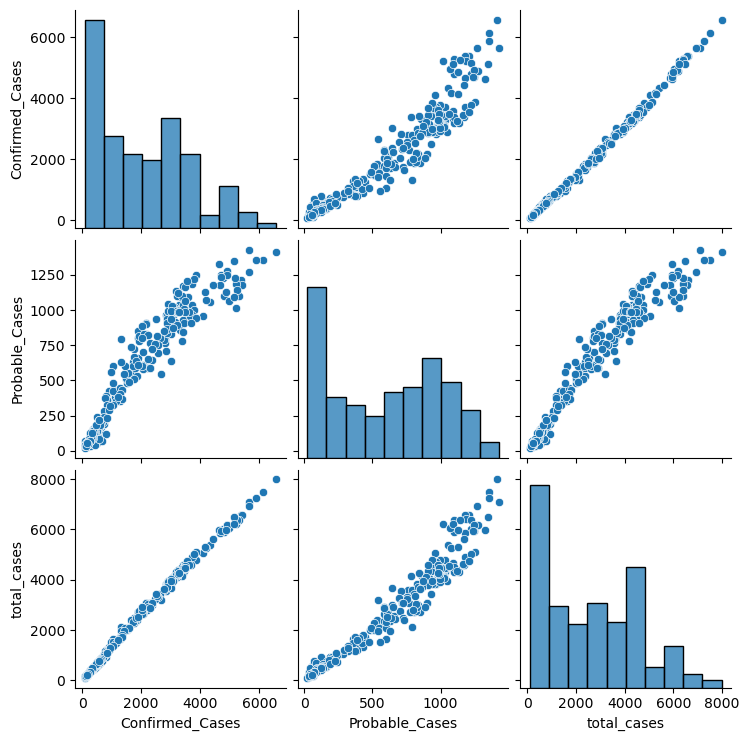

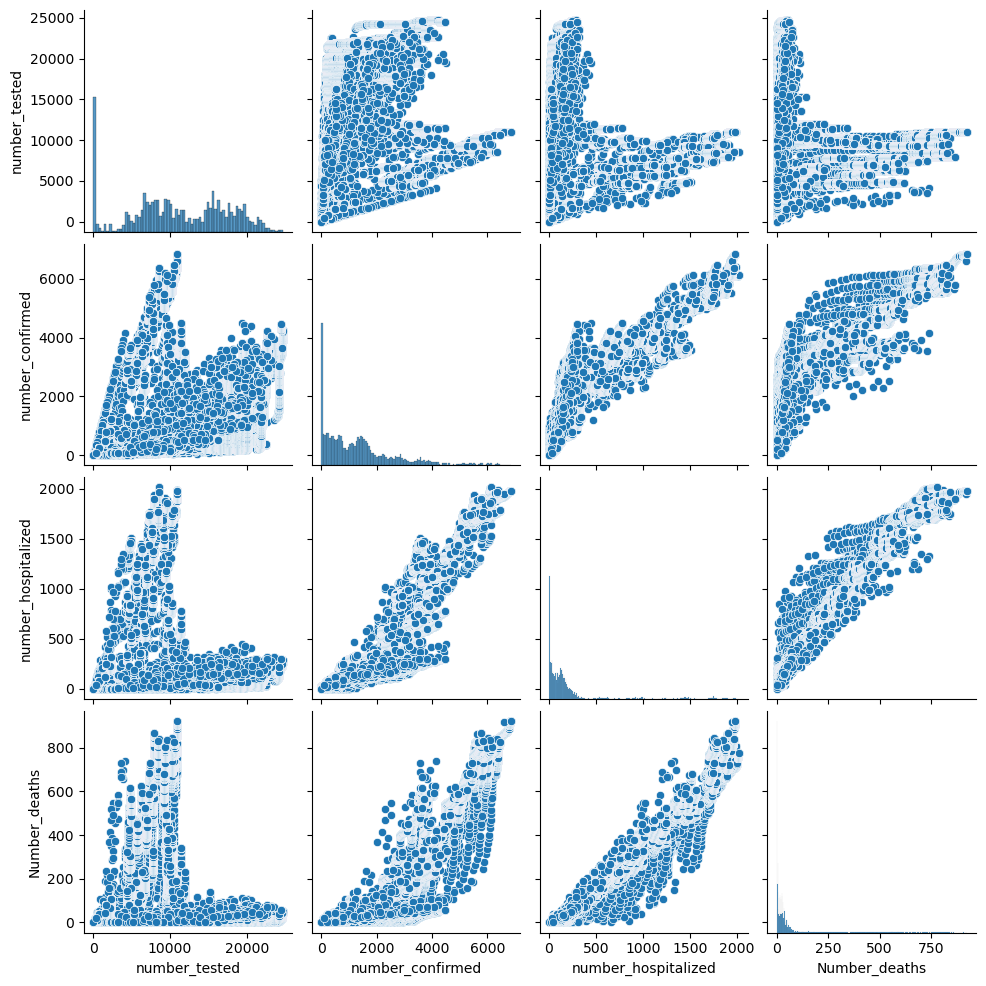

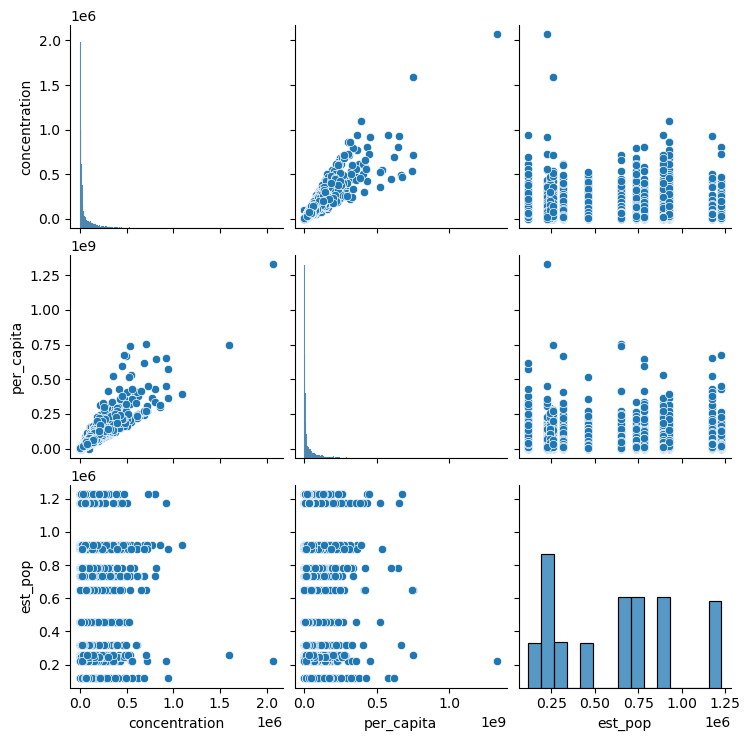

In [15]:
sns.pairplot(covid_case)
sns.pairplot(covid_out)
sns.pairplot(covid_waste)

In [16]:
#must get the dates of the column to match the other data sets
#want to see if we can predict a rise in cases or positive with a rise in waste water covid results


In [17]:
print(covid_out['sample_date'].max())
print(covid_out['sample_date'].min())
print('covid out dates')
print(covid_waste['sample_date'].max())
print(covid_waste['sample_date'].min())
print('covid waste dates')
print(covid_case['sample_date'].max())
print(covid_case['sample_date'].min())
print('covid case dates')

2021-09-28 00:00:00
2020-01-01 00:00:00
covid out dates
2024-05-14 00:00:00
2020-08-31 00:00:00
covid waste dates
2021-06-13 00:00:00
2020-09-20 00:00:00
covid case dates


In [18]:
#covid waste has a large date range
#we should make the dates match inorder to draw comparisons

In [19]:
mask1 = (covid_waste['sample_date'] > '2020-08-01') & (covid_waste['sample_date'] <= '2021-09-01')

covid_waste_short= covid_waste.loc[mask1]
print(covid_waste_short.head())

mask2 = (covid_out['sample_date'] > '2020-08-01') & (covid_out['sample_date'] <= '2021-09-01')
covid_out_short= covid_out.loc[mask2]
print(covid_out_short.head())


  sample_date collection_site  concentration  per_capita  est_pop
0  2020-08-31       26th Ward          389.0    264000.0   318262
1  2020-08-31      Bowery Bay         1204.0    444000.0   894311
2  2020-08-31    Coney Island          304.0    169000.0   647635
3  2020-08-31     Hunts Point          940.0    574000.0   781885
4  2020-08-31     Jamaica Bay          632.0    233000.0   735054
      sample_date  number_tested  number_confirmed  number_hospitalized  \
12693  2020-08-02             40                 1                    0   
12768  2020-08-02           1259                12                    4   
12835  2020-08-03             71                 1                    0   
12926  2020-08-02           3018                54                    8   
12932  2020-08-05            104                 2                    0   

       Number_deaths  
12693              0  
12768              0  
12835              0  
12926              0  
12932              0  


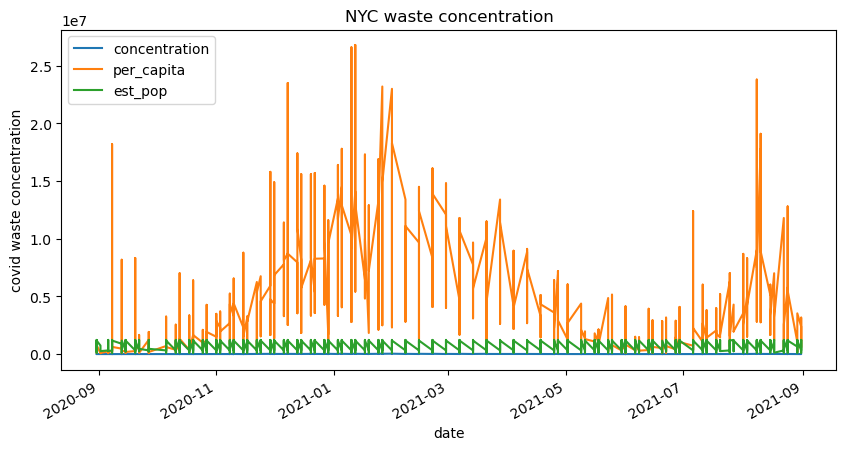

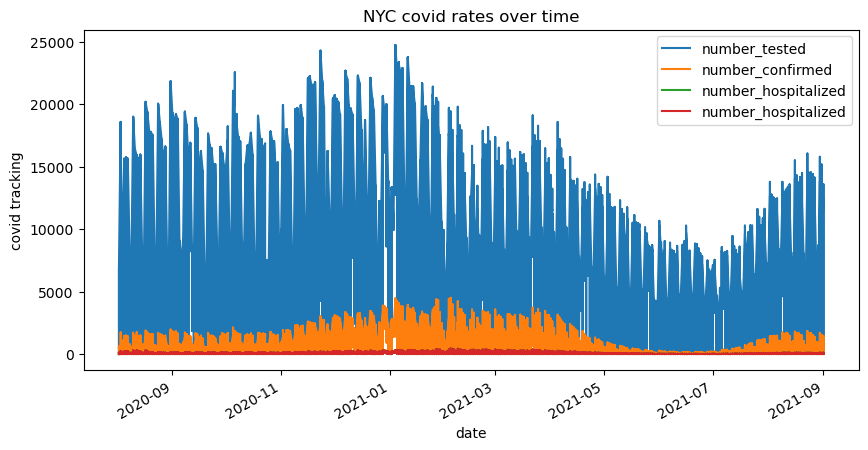

In [20]:
covid_waste_short.plot(x='sample_date', y=['collection_site', 'concentration', 'per_capita', 'est_pop'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid waste concentration')

plt.title('NYC waste concentration')

plt.show()




covid_out_short.plot(x='sample_date', y=['number_tested', 'number_confirmed', 'number_hospitalized', 'number_hospitalized'],figsize=(10,5))

plt.xlabel('date')

plt.ylabel('covid tracking')

plt.title('NYC covid rates over time')

plt.show()



In [21]:
#the peaks of per_capita may indicate a spike in number tested or number confirmed

In [22]:
##per_capita defition from NYC data source
#A value indicating the concentration normalized by the population served by the WRRF and the quantity of wastewater influent to the plant on the sample date (flowrate) (“Per capita SARS-CoV-2 load”, in units of N1 or SC2 copies/day/capita), which represents the total number of SARS-CoV-2 virus copies per capita in wastewater entering a WRRF over a 24 hour period.
#basically it is a calulation of how much virus comes through the data collection site based on how many people the treatment plant serves in a 24 hour period

#outbreaks come in waves so we are intrested in the peaks of the data in the waste leading to a peak in the case numbers


In [23]:
covid_waste_short=covid_waste_short.drop('collection_site', axis=1)
covid_waste_short=covid_waste_short.drop('est_pop', axis=1)


In [24]:
covid_time1= pd.merge(covid_waste_short, covid_out_short, on='sample_date')
print(covid_time1.head())
covid_time1.isnull().sum()

  sample_date  concentration  per_capita  number_tested  number_confirmed  \
0  2020-08-31          389.0    264000.0             60                 1   
1  2020-08-31          389.0    264000.0           3561                32   
2  2020-08-31          389.0    264000.0          12431                80   
3  2020-08-31          389.0    264000.0          17473               145   
4  2020-08-31          389.0    264000.0          18940               172   

   number_hospitalized  Number_deaths  
0                    0              0  
1                    1              0  
2                   10              0  
3                   18              0  
4                   18              0  


sample_date            0
concentration          0
per_capita             0
number_tested          0
number_confirmed       0
number_hospitalized    0
Number_deaths          0
dtype: int64

/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_42508/2932416337.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid_time1.corr(), annot=True)


<Axes: >

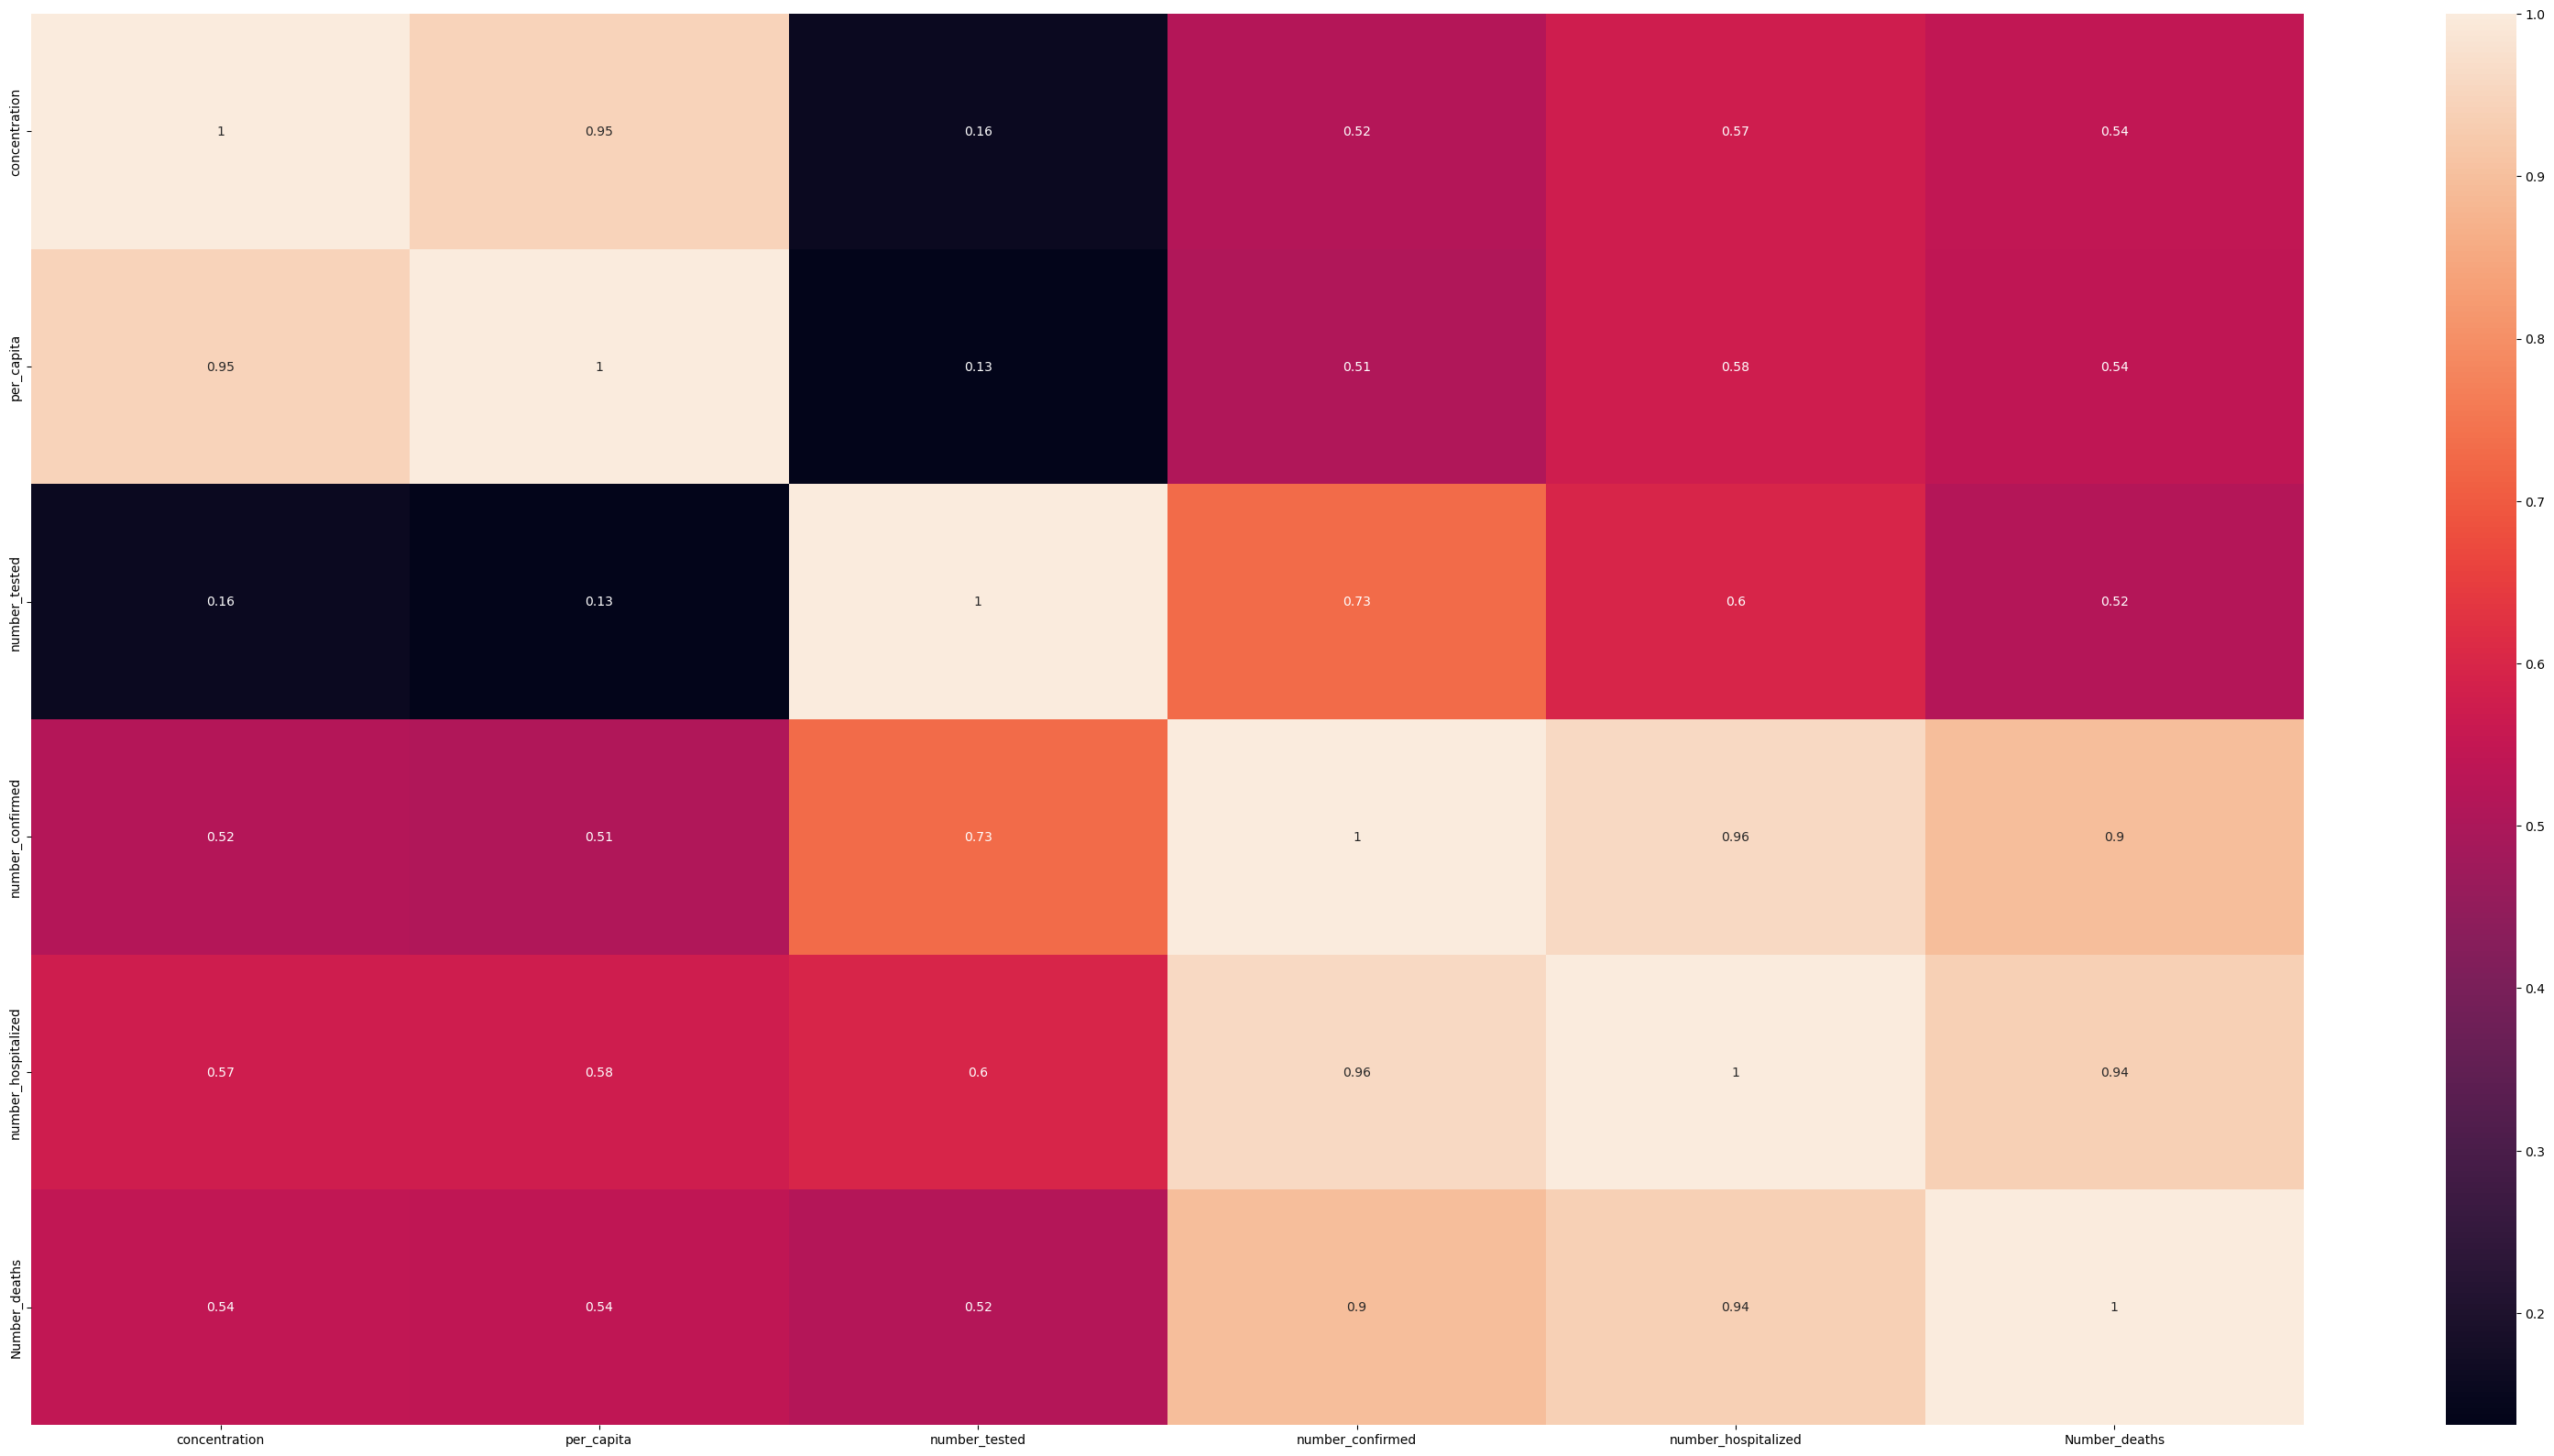

In [25]:
plt.figure(figsize=(40, 20))

sns.heatmap(covid_time1.corr(), annot=True)

In [26]:
#our observations from the graphs seem to show that per_capita correlates with number confirmed, number hospitalized, and number of deaths

In [27]:
correlation_matrix= covid_time1.corr(method='pearson')
print(correlation_matrix)

                     concentration  per_capita  number_tested  \
concentration             1.000000    0.945509       0.157940   
per_capita                0.945509    1.000000       0.131051   
number_tested             0.157940    0.131051       1.000000   
number_confirmed          0.515754    0.508627       0.730787   
number_hospitalized       0.573271    0.575328       0.598586   
Number_deaths             0.543993    0.540407       0.516646   

                     number_confirmed  number_hospitalized  Number_deaths  
concentration                0.515754             0.573271       0.543993  
per_capita                   0.508627             0.575328       0.540407  
number_tested                0.730787             0.598586       0.516646  
number_confirmed             1.000000             0.957624       0.896985  
number_hospitalized          0.957624             1.000000       0.938101  
Number_deaths                0.896985             0.938101       1.000000  


/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_42508/2028093755.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= covid_time1.corr(method='pearson')


In [28]:
# it does look like there is some correlation with the per_capita test and the number_confirmed, number_hospitalized, number_death
#the stronger correlation of per_capita and concentration is due to that they are related observations
#there is a strong correlation of number_tested and number_confirmed but you could argue you would only find positive samples from the population you test


In [33]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit


covid_time1 = {
    'sample_date': pd.date_range(start='2020-09-01', periods=10, freq='D'),
    'per_capita': range(10),
    'number_confirmed': range(10, 20)
}
covid_time1 = pd.DataFrame(covid_time1)

# Ensure that covid_time1 is a DataFrame
if isinstance(covid_time1, pd.DataFrame):
    # Set 'sample_date' as the index
    covid_time1.set_index('sample_date', inplace=True)
    covid_time1.sort_index(inplace=True)

    # Define X and y
    X = covid_time1
    y = covid_time1.index

    # Initialize TimeSeriesSplit
    tss = TimeSeriesSplit(n_splits=3)

    # Split the data using TimeSeriesSplit
    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]

        print("TRAIN indices:", train_index, "TEST indices:", test_index)
        print("X_train:", X_train, "X_test:", X_test)
        print("y_train:", y_train, "y_test:", y_test)
else:
    print("covid_time1 is not a DataFrame")



TRAIN indices: [0 1 2 3] TEST indices: [4 5]
X_train:              per_capita  number_confirmed
sample_date                              
2020-09-01            0                10
2020-09-02            1                11
2020-09-03            2                12
2020-09-04            3                13 X_test:              per_capita  number_confirmed
sample_date                              
2020-09-05            4                14
2020-09-06            5                15
y_train: DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04'], dtype='datetime64[ns]', name='sample_date', freq=None) y_test: DatetimeIndex(['2020-09-05', '2020-09-06'], dtype='datetime64[ns]', name='sample_date', freq=None)
TRAIN indices: [0 1 2 3 4 5] TEST indices: [6 7]
X_train:              per_capita  number_confirmed
sample_date                              
2020-09-01            0                10
2020-09-02            1                11
2020-09-03            2                12
2020-09

In [34]:
import pandas as pd
import numpy as np

# Sample data creation (Replace this with your actual data)
covid_time1 = {
    'sample_date': pd.date_range(start='2020-09-01', periods=100, freq='D'),
    'per_capita': np.random.randint(0, 100, size=100),
    'number_confirmed': np.random.rand(100) * 1000
}
df = pd.DataFrame(covid_time1)

# Ensure 'date' is the index
df.set_index('sample_date', inplace=True)

# Define the window size for the rolling calculation
window_size = 7

# Calculate the rolling window for COVID-19 cases
df['rolling_covid_cases'] = df['per_capita'].rolling(window=window_size).mean()

# Drop NaN values that result from rolling window operation
df.dropna(subset=['rolling_covid_cases'], inplace=True)

# Calculate the correlation between rolling COVID-19 cases and GDP
correlation = df['rolling_covid_cases'].corr(df['number_confirmed'])

print("Correlation between rolling COVID-19 cases and number_confirmed:", correlation)


Correlation between rolling COVID-19 cases and number_confirmed: 0.152785942365054


In [ ]:
#although the graphs look like there could be some predictive value in measure waste water
#it appears that you cannot measure waste water and predict possible outbreaks
